<a href="https://colab.research.google.com/github/steffiangel/Speech-Processing/blob/main/2348510_spr_lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Predictive Coding

<ipython-input-1-a4c81284b60f>:5: WavFileWarning: Reached EOF prematurely; finished at 10485760 bytes, expected 13000052 bytes from header.
  sample_rate, data = wavfile.read('/content/Harvard list 01.wav')


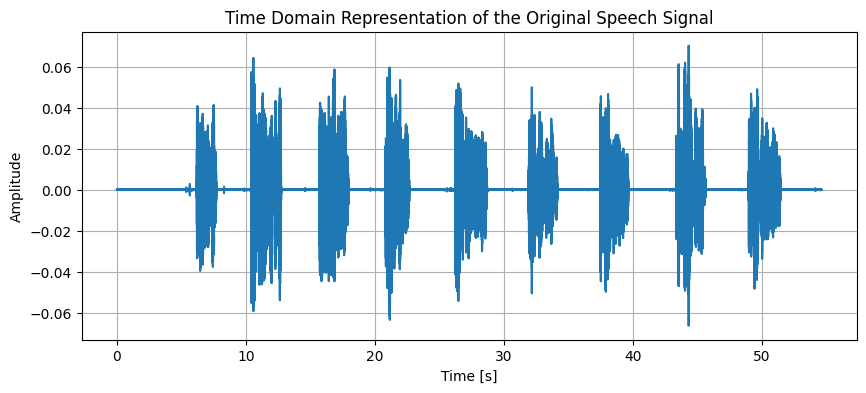

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

sample_rate, data = wavfile.read('/content/Harvard list 01.wav')

time = np.linspace(0, len(data) / sample_rate, num=len(data))

# Plot the time domain representation
plt.figure(figsize=(10, 4))
plt.plot(time, data)
plt.title('Time Domain Representation of the Original Speech Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


In [2]:

import librosa
from scipy.signal import lfilter

def lpc_analysis(signal, order=12):

    r = np.correlate(signal, signal, mode='full')
    r = r[len(r)//2:]
    R = scipy.linalg.toeplitz(r[:-1])
    lpc_coeffs = np.dot(np.linalg.pinv(R), -r[1:])
    return lpc_coeffs


In [ ]:
import scipy
import librosa
signal = np.append(data[0], data[1:] - 0.97 * data[:-1])

frame_length = 1
frame_stride = 1
frame_length_samples = int(frame_length * sample_rate)
frame_stride_samples = int(frame_stride * sample_rate)

frames = librosa.util.frame(signal, frame_length=frame_length_samples, hop_length=frame_stride_samples).T

lpc_coeffs = []
for frame in frames:
    lpc_coeffs.append(lpc_analysis(frame))

print(lpc_coeffs)
